In [1]:
import os, json, glob, sys, numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import keras.backend.tensorflow_backend as K
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Flatten, Dropout, Input, Conv1D, MaxPooling1D, GlobalMaxPool1D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

C:\Users\leesoojin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
data_6m = pd.read_csv('./datas_after_tokenizer/6m/6m_after_prepro.csv')
data_7m = pd.read_csv('./datas_after_tokenizer/7m/7m_after_prepro.csv')
data_8m = pd.read_csv('./datas_after_tokenizer/8m/8m_after_prepro.csv')
data_9m = pd.read_csv('./datas_after_tokenizer/9m/9m_after_prepro.csv')

In [11]:
print(len(data_6m.iloc[:, 0]))
print(len(data_7m.iloc[:, 0]))
print(len(data_8m.iloc[:, 0]))
print(len(data_9m.iloc[:, 0]))

201431
310420
412447
504047


In [12]:
df_6m = data_6m.sample(frac=1).reset_index(drop=True)
df_7m = data_7m.sample(frac=1).reset_index(drop=True)
df_8m = data_8m.sample(frac=1).reset_index(drop=True)
df_9m = data_9m.sample(frac=1).reset_index(drop=True)
print(df_6m.iloc[0:10,2])

0    0
1    0
2    0
3    0
4    0
5    2
6    1
7    2
8    0
9    1
Name: 1, dtype: int64


In [13]:
print(len(df_7m.iloc[:, 0]))

310420


In [15]:
X_6m = df_6m.iloc[:, 1].values
y_6m = df_6m.iloc[:, 2].values
X_7m = df_7m.iloc[:, 1].values
y_7m = df_7m.iloc[:, 2].values
X_8m = df_8m.iloc[:, 1].values
y_8m = df_8m.iloc[:, 2].values
X_9m = df_9m.iloc[:, 1].values
y_9m = df_9m.iloc[:, 2].values

In [16]:
print(len(X_6m), len(y_6m))

201431 201431


In [17]:
nb_classes = len(set(y_6m))
print(nb_classes)
y_6m = np_utils.to_categorical(y_6m, nb_classes)
y_7m = np_utils.to_categorical(y_7m, nb_classes)
y_8m = np_utils.to_categorical(y_8m, nb_classes)
y_9m = np_utils.to_categorical(y_9m, nb_classes)
print(y_6m)
print(y_8m)

4
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [18]:
max_word = 7000
max_len = 500

tok = Tokenizer(num_words = max_word)
tok.fit_on_texts(X_6m)
print(len(tok.word_index))

97533


In [19]:
tok.fit_on_texts(X_7m)
print(len(tok.word_index))

120098


In [20]:
tok.fit_on_texts(X_8m)
print(len(tok.word_index))

134162


In [21]:
tok.fit_on_texts(X_9m)
print(len(tok.word_index))

144899


In [22]:
sequences_6m = tok.texts_to_sequences(X_6m)
sequences_7m = tok.texts_to_sequences(X_7m)
sequences_8m = tok.texts_to_sequences(X_8m)
sequences_9m = tok.texts_to_sequences(X_9m)
print(len(sequences_6m[0]))
print(sequences_6m[0])
print(len(sequences_7m[0]))
print(sequences_7m[0])
print(len(sequences_8m[0]))
print(sequences_8m[0])
print(len(sequences_9m[0]))
print(sequences_9m[0])

383
[3859, 486, 7, 1106, 1000, 275, 5779, 18, 18, 18, 13, 16, 6, 15, 10, 9, 2377, 302, 350, 6722, 1000, 69, 9, 30, 22, 65, 28, 6531, 2, 635, 602, 1072, 9, 1943, 28, 1028, 5778, 2992, 238, 5, 4, 9, 5, 4, 486, 6682, 30, 1000, 1000, 69, 9, 30, 22, 2, 9, 30, 28, 751, 3, 6484, 103, 9, 30, 323, 1, 28, 83, 2928, 30, 1000, 598, 2605, 184, 73, 476, 5751, 1169, 69, 1838, 6112, 69, 462, 1638, 74, 34, 34, 28, 715, 47, 1000, 598, 452, 2, 261, 74, 120, 9, 3417, 479, 275, 191, 3, 4228, 1813, 465, 1130, 896, 104, 204, 28, 715, 1966, 1, 263, 598, 152, 95, 39, 120, 41, 1981, 302, 432, 366, 3569, 528, 28, 637, 45, 2, 1673, 1309, 3052, 674, 474, 1559, 952, 22, 396, 2824, 26, 263, 598, 58, 1337, 293, 3, 106, 35, 4665, 222, 73, 48, 1673, 4921, 679, 5917, 165, 3717, 533, 288, 2956, 1727, 3, 6523, 79, 179, 408, 2377, 693, 30, 693, 3717, 533, 288, 1144, 693, 6, 2082, 1347, 363, 28, 637, 4369, 1559, 22, 952, 22, 1181, 161, 1841, 822, 4421, 73, 302, 255, 3364, 1181, 4711, 68, 278, 343, 302, 387, 263, 598, 28, 63

In [23]:
tok.word_index

{'했': 1,
 '일': 2,
 '해': 3,
 '기자': 4,
 '뉴스': 5,
 '위한': 6,
 '년': 7,
 '및': 8,
 '서울': 9,
 '추가': 10,
 '금지': 11,
 '배포': 12,
 '오류': 13,
 '무단': 14,
 '함수': 15,
 '우회': 16,
 '원': 17,
 '말': 18,
 '전재': 19,
 '경제': 20,
 '월': 21,
 '후보': 22,
 '사진': 23,
 '대통령': 24,
 '한국': 25,
 '이': 26,
 '없': 27,
 '선거': 28,
 '대표': 29,
 '시장': 30,
 '명': 31,
 '회담': 32,
 '한다': 33,
 '의원': 34,
 '대한': 35,
 '오후': 36,
 '북한': 37,
 '미국': 38,
 '통해': 39,
 '있': 40,
 '더': 41,
 '뉴시스': 42,
 '됐': 43,
 '정부': 44,
 '지난': 45,
 '안': 46,
 '위해': 47,
 '이번': 48,
 '이미지': 49,
 '함께': 50,
 '같': 51,
 '위원장': 52,
 '시간': 53,
 '바로': 54,
 '김': 55,
 '이날': 56,
 '기업': 57,
 '방송': 58,
 '정상': 59,
 '제보': 60,
 '원본': 61,
 '가능': 62,
 '개': 63,
 '우리': 64,
 '지방': 65,
 '진행': 66,
 '된다': 67,
 '문제': 68,
 '민주당': 69,
 '관련': 70,
 '기술': 71,
 '영상': 72,
 '그': 73,
 '시': 74,
 '연합뉴스': 75,
 '또': 76,
 '때': 77,
 '당': 78,
 '사람': 79,
 '위': 80,
 '지역': 81,
 '사업': 82,
 '전': 83,
 '저작권자': 84,
 '제공': 85,
 '공개': 86,
 '많': 87,
 '문': 88,
 '남북': 89,
 '장관': 90,
 '정보': 91,
 '중국': 92,
 '채널': 93,
 '스타

In [24]:
sequences_matrix_6m = sequence.pad_sequences(sequences_6m, maxlen=max_len)
sequences_matrix_7m = sequence.pad_sequences(sequences_7m, maxlen=max_len)
sequences_matrix_8m = sequence.pad_sequences(sequences_8m, maxlen=max_len)
sequences_matrix_9m = sequence.pad_sequences(sequences_9m, maxlen=max_len)
#print(sequences_matrix)
#print(sequences_matrix[0])
print(len(sequences_matrix_6m))
print(len(sequences_matrix_7m))
print(len(sequences_matrix_8m))
print(len(sequences_matrix_9m))

201431
310420
412447
504047


In [25]:
X_train_6m, X_test_6m, y_train_6m, y_test_6m = train_test_split(sequences_matrix_6m, y_6m, test_size=0.2)
X_train_7m, X_test_7m, y_train_7m, y_test_7m = train_test_split(sequences_matrix_7m, y_7m, test_size=0.2)
X_train_8m, X_test_8m, y_train_8m, y_test_8m = train_test_split(sequences_matrix_8m, y_8m, test_size=0.2)
X_train_9m, X_test_9m, y_train_9m, y_test_9m = train_test_split(sequences_matrix_9m, y_9m, test_size=0.2)

print(X_train_6m.shape)
print(X_train_8m.shape)

(161144, 500)
(329957, 500)


In [29]:
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    
    model.add(Embedding(max_word, 64, input_length=max_len))
    model.add(LSTM(60, return_sequences=True))
    model.add(GlobalMaxPool1D())
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './model'
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    model_path = model_dir + "/hwang_lstm.model"
    checkpoint = ModelCheckpoint(filepath=model_path, monitor="val_loss", verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 64)           448000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 500, 60)           30000     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 60)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                3050      
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 204       
Total para

In [31]:
hist = model.fit(X_train_6m, y_train_6m, batch_size=500, epochs=20, validation_split=0.2, callbacks=[checkpoint, early_stopping])

Train on 128915 samples, validate on 32229 samples
Epoch 1/20
128915/128915 [==============================] - 236s 2ms/step - loss: 0.4997 - acc: 0.8151 - val_loss: 0.1502 - val_acc: 0.9490

Epoch 00001: val_loss improved from inf to 0.15021, saving model to ./model/hwang_lstm.model
Epoch 2/20
128915/128915 [==============================] - 255s 2ms/step - loss: 0.1517 - acc: 0.9549 - val_loss: 0.1197 - val_acc: 0.9607

Epoch 00002: val_loss improved from 0.15021 to 0.11966, saving model to ./model/hwang_lstm.model
Epoch 3/20
128915/128915 [==============================] - 257s 2ms/step - loss: 0.1173 - acc: 0.9648 - val_loss: 0.1052 - val_acc: 0.9641

Epoch 00003: val_loss improved from 0.11966 to 0.10518, saving model to ./model/hwang_lstm.model
Epoch 4/20
128915/128915 [==============================] - 255s 2ms/step - loss: 0.0957 - acc: 0.9715 - val_loss: 0.1027 - val_acc: 0.9658

Epoch 00004: val_loss improved from 0.10518 to 0.10272, saving model to ./model/hwang_lstm.model
E

In [32]:
hist = model.fit(X_train_7m, y_train_7m, batch_size=500, epochs=20, validation_split=0.2, callbacks=[checkpoint, early_stopping])

Train on 198668 samples, validate on 49668 samples
Epoch 1/20
198668/198668 [==============================] - 345s 2ms/step - loss: 0.1191 - acc: 0.9617 - val_loss: 0.0934 - val_acc: 0.9672

Epoch 00001: val_loss improved from 0.09826 to 0.09340, saving model to ./model/hwang_lstm.model
Epoch 2/20
198668/198668 [==============================] - 313s 2ms/step - loss: 0.0938 - acc: 0.9692 - val_loss: 0.0915 - val_acc: 0.9686

Epoch 00002: val_loss improved from 0.09340 to 0.09145, saving model to ./model/hwang_lstm.model
Epoch 3/20
198668/198668 [==============================] - 310s 2ms/step - loss: 0.0812 - acc: 0.9732 - val_loss: 0.0961 - val_acc: 0.9677

Epoch 00003: val_loss did not improve from 0.09145
Epoch 4/20
198668/198668 [==============================] - 327s 2ms/step - loss: 0.0752 - acc: 0.9746 - val_loss: 0.0967 - val_acc: 0.9680

Epoch 00004: val_loss did not improve from 0.09145
Epoch 5/20
198668/198668 [==============================] - 308s 2ms/step - loss: 0.0699 

In [33]:
hist = model.fit(X_train_8m, y_train_8m, batch_size=500, epochs=20, validation_split=0.2, callbacks=[checkpoint, early_stopping])

Train on 263965 samples, validate on 65992 samples
Epoch 1/20
263965/263965 [==============================] - 414s 2ms/step - loss: 0.1072 - acc: 0.9647 - val_loss: 0.0896 - val_acc: 0.9679

Epoch 00001: val_loss improved from 0.09145 to 0.08957, saving model to ./model/hwang_lstm.model
Epoch 2/20
263965/263965 [==============================] - 430s 2ms/step - loss: 0.0877 - acc: 0.9699 - val_loss: 0.0916 - val_acc: 0.9672

Epoch 00002: val_loss did not improve from 0.08957
Epoch 3/20
263965/263965 [==============================] - 432s 2ms/step - loss: 0.0789 - acc: 0.9725 - val_loss: 0.0919 - val_acc: 0.9669

Epoch 00003: val_loss did not improve from 0.08957
Epoch 4/20
263965/263965 [==============================] - 443s 2ms/step - loss: 0.0716 - acc: 0.9752 - val_loss: 0.0967 - val_acc: 0.9673

Epoch 00004: val_loss did not improve from 0.08957


In [34]:
hist = model.fit(X_train_9m, y_train_9m, batch_size=500, epochs=20, validation_split=0.2, callbacks=[checkpoint, early_stopping])

Train on 322589 samples, validate on 80648 samples
Epoch 1/20
322589/322589 [==============================] - 549s 2ms/step - loss: 0.1010 - acc: 0.9659 - val_loss: 0.0857 - val_acc: 0.9675

Epoch 00001: val_loss improved from 0.08957 to 0.08575, saving model to ./model/hwang_lstm.model
Epoch 2/20
322589/322589 [==============================] - 617s 2ms/step - loss: 0.0846 - acc: 0.9705 - val_loss: 0.0843 - val_acc: 0.9695

Epoch 00002: val_loss improved from 0.08575 to 0.08432, saving model to ./model/hwang_lstm.model
Epoch 3/20
322589/322589 [==============================] - 614s 2ms/step - loss: 0.0759 - acc: 0.9733 - val_loss: 0.0897 - val_acc: 0.9680

Epoch 00003: val_loss did not improve from 0.08432
Epoch 4/20
322589/322589 [==============================] - 574s 2ms/step - loss: 0.0691 - acc: 0.9753 - val_loss: 0.0916 - val_acc: 0.9673

Epoch 00004: val_loss did not improve from 0.08432
Epoch 5/20
322589/322589 [==============================] - 562s 2ms/step - loss: 0.0638 

In [35]:
print("정확도 : %.4f" % (model.evaluate(X_test_6m, y_test_6m)[1]))

40287/40287 [==============================] - 345s 9ms/step
정확도 : 0.9844


In [36]:
print("정확도 : %.4f" % (model.evaluate(X_test_7m, y_test_7m)[1]))

62084/62084 [==============================] - 531s 9ms/step
정확도 : 0.9799


In [37]:
print("정확도 : %.4f" % (model.evaluate(X_test_8m, y_test_8m)[1]))

82490/82490 [==============================] - 697s 8ms/step
정확도 : 0.9771


In [38]:
print("정확도 : %.4f" % (model.evaluate(X_test_9m, y_test_9m)[1]))

100810/100810 [==============================] - 833s 8ms/step
정확도 : 0.9671


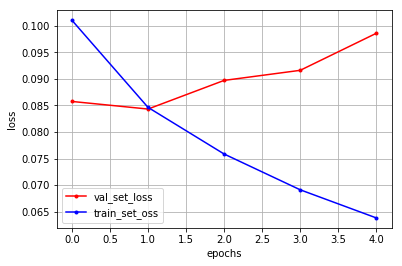

In [39]:
y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

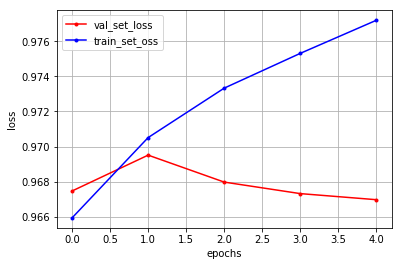

In [40]:
y_vloss = hist.history['val_acc']
y_loss = hist.history['acc']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [42]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [43]:
tokenizer.word_index

{'했': 1,
 '일': 2,
 '해': 3,
 '기자': 4,
 '뉴스': 5,
 '위한': 6,
 '년': 7,
 '및': 8,
 '서울': 9,
 '추가': 10,
 '금지': 11,
 '배포': 12,
 '오류': 13,
 '무단': 14,
 '함수': 15,
 '우회': 16,
 '원': 17,
 '말': 18,
 '전재': 19,
 '경제': 20,
 '월': 21,
 '후보': 22,
 '사진': 23,
 '대통령': 24,
 '한국': 25,
 '이': 26,
 '없': 27,
 '선거': 28,
 '대표': 29,
 '시장': 30,
 '명': 31,
 '회담': 32,
 '한다': 33,
 '의원': 34,
 '대한': 35,
 '오후': 36,
 '북한': 37,
 '미국': 38,
 '통해': 39,
 '있': 40,
 '더': 41,
 '뉴시스': 42,
 '됐': 43,
 '정부': 44,
 '지난': 45,
 '안': 46,
 '위해': 47,
 '이번': 48,
 '이미지': 49,
 '함께': 50,
 '같': 51,
 '위원장': 52,
 '시간': 53,
 '바로': 54,
 '김': 55,
 '이날': 56,
 '기업': 57,
 '방송': 58,
 '정상': 59,
 '제보': 60,
 '원본': 61,
 '가능': 62,
 '개': 63,
 '우리': 64,
 '지방': 65,
 '진행': 66,
 '된다': 67,
 '문제': 68,
 '민주당': 69,
 '관련': 70,
 '기술': 71,
 '영상': 72,
 '그': 73,
 '시': 74,
 '연합뉴스': 75,
 '또': 76,
 '때': 77,
 '당': 78,
 '사람': 79,
 '위': 80,
 '지역': 81,
 '사업': 82,
 '전': 83,
 '저작권자': 84,
 '제공': 85,
 '공개': 86,
 '많': 87,
 '문': 88,
 '남북': 89,
 '장관': 90,
 '정보': 91,
 '중국': 92,
 '채널': 93,
 '스타